In [1]:
import numpy as np
from matplotlib import pyplot as plt
import simple_GP_temperature.helper_sklearn as helper
from simple_GP_temperature.bell_curve import Bellcurve
from simple_GP_temperature.non_convex_function import NonConvexFunction
from simple_GP_temperature.ackley_function import AckleyFunction
from simple_GP_temperature.schaffer_function import SchafferFunction
from simple_GP_temperature.random_initial_2d import RandomInit2D
from simple_GP_temperature.BO_GP_temperature import BOTemperatureGP
from simple_GP_temperature.full_factorial_2d import FullFacInit2D
from simple_GP_temperature.central_composite_initial_2d import CentralCompInit2D
from simple_GP_temperature.local_optima_initial_non_convex_2d import LocalOptimaInit2DNonConvex
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import entropy
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
def find_stable_point(data_dict, start_index, threshold):
     # Convert the dictionary to a list of items, sorted by the keys
     data_list = sorted(list(data_dict.items()))
     # Start from the given index
     for i in range(start_index, len(data_list)-1):
         # Calculate the difference between the current and next value
         if i+3 <= len(data_list)-1:
             difference = abs(((data_list[i][1]-data_list[i+1][1])+(data_list[i+1][1] - data_list[i+2][1])+(data_list[i+2][1]-data_list[i+3][1]))/3)
         else:
             difference = threshold+1
         # If the difference is below the threshold, return the current index
         if difference < threshold:
             return i

     # If no stable point was found, return None
     return None

In [3]:
# instantiate objective functions
non_convex_func = NonConvexFunction()
ackley_func = AckleyFunction()
schaffer_func = SchafferFunction()

In [4]:
def imporvement_curve(data_dict, start_index):
    #convert the dictionary to a list of items, sorted by the keys 
    data_list = sorted(list(data_dict.items()))
    result_curve = []
    result_curve.append(data_list[start_index][1])
    for i in range(start_index,len(data_list)-1):
        if abs(data_list[i][1])<abs(result_curve[-1]):
            result_curve.append(data_list[i][1])
        else: result_curve.append(result_curve[-1])
    return result_curve

In [5]:
def sample_entropy(initial_sample_lst):
    initial_sample = np.array(initial_sample_lst)
    kde = gaussian_kde(initial_sample.T)
    x_grid, y_grid = np.meshgrid(np.linspace(initial_sample[:, 0].min(), initial_sample[:, 0].max(), 100),
                             np.linspace(initial_sample[:, 1].min(), initial_sample[:, 1].max(), 100))
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    pdf_values = kde(positions)
    sample_entropy = entropy(pdf_values, base=2)
    print("Entropy of the initial sample:", sample_entropy)
    return sample_entropy

AckleyFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 8

In [8]:
local_opt_ack_cc_8_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(0,0))
    bayes_opt_central_comp_ackley_8_local_opt = BOTemperatureGP(evaluation_component=ackley_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=8)
    local_opt_ack_cc_8_mappings_lst.append(bayes_opt_central_comp_ackley_8_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:42<00:00,  8.05s/it]


In [12]:
local_opt_ack_cc_8_mappings_lst[0]

{(5.292893218813452, 5.292893218813452): 30.41302850718124,
 (6.707106781186548, 5.292893218813452): 29.44758365842156,
 (5.292893218813452, 6.707106781186548): 29.44474637882414,
 (6.707106781186548, 6.707106781186548): 28.708542522250273,
 (5.0, 6.0): 32.081417423819055,
 (7.0, 6.0): 30.870441976048156,
 (6.0, 5.0): 32.065490194971694,
 (6.0, 7.0): 30.859325251725533,
 (5.94999999999966, 5.859999999999662): 31.08032719774499,
 (5.989999999999659, 5.47999999999967): 30.075386116704614,
 (6.199999999999655, 6.499999999999648): 29.05523272147639,
 (6.369999999999649, 4.3299999999996945): 30.00222114269545,
 (5.779999999999664, 6.1499999999996575): 30.264871359785793,
 (6.519999999999648, 7.959999999999617): 28.36766680611273,
 (5.349999999999673, 7.539999999999626): 28.582969891332993,
 (5.319999999999673, 4.149999999999698): 31.501171410671667,
 (5.919999999999661, 4.6599999999996875): 30.790163507259678,
 (4.259999999999696, 4.55999999999969): 31.599744371841318,
 (4.689999999999687, 

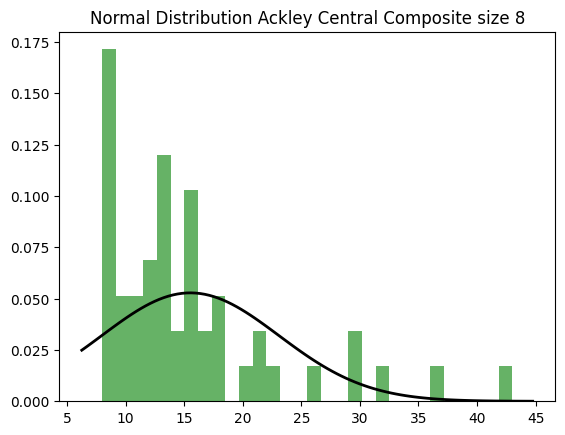

In [9]:
threshold = 0.1
converge_iter_num_lst_ack_cc_8 = []
for local_opt_mappings in local_opt_ack_cc_8_mappings_lst:
    converge_iter_num_lst_ack_cc_8.append(find_stable_point(local_opt_mappings, 8, threshold))

numbers = converge_iter_num_lst_ack_cc_8
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Ackley Central Composite size 8")
plt.show()

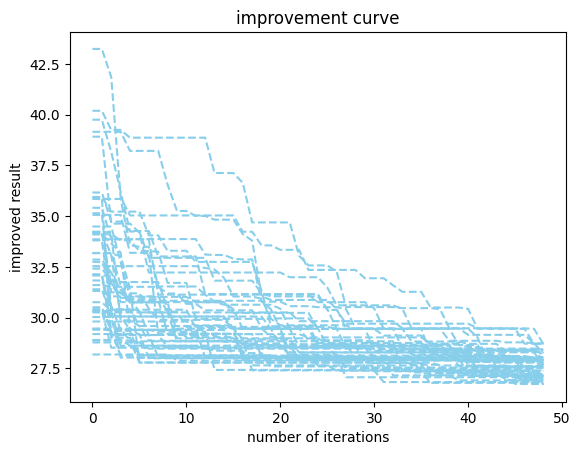

In [11]:
improve_iter_num_lst_lst_ack_cc_8 = []
for local_opt_mappings in local_opt_ack_cc_8_mappings_lst:
    improve_iter_num_lst_lst_ack_cc_8.append(imporvement_curve(local_opt_mappings, start_index = 9))

x_value=range(len(improve_iter_num_lst_lst_ack_cc_8[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_ack_cc_8):
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

AckleyFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 12

In [17]:
local_opt_ack_cc_12_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(2,2))
    bayes_opt_central_comp_ackley_12_local_opt = BOTemperatureGP(evaluation_component=ackley_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=12)
    local_opt_ack_cc_12_mappings_lst.append(bayes_opt_central_comp_ackley_12_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:46<00:00,  8.13s/it]


In [19]:
local_opt_ack_cc_12_mappings_lst[0]

{(5.292893218813452, 5.292893218813452): 30.423169194903455,
 (6.707106781186548, 5.292893218813452): 29.443094553139456,
 (5.292893218813452, 6.707106781186548): 29.465907268961736,
 (6.707106781186548, 6.707106781186548): 28.718377151418192,
 (6.0, 6.0): 31.46862458154022,
 (5.0, 6.0): 32.06315066730523,
 (7.0, 6.0): 30.857303096165445,
 (6.0, 5.0): 32.05988182803813,
 (6.0, 7.0): 30.869669607246266,
 (6.259999999999653, 5.539999999999669): 29.44503385929434,
 (5.329999999999673, 6.0199999999996585): 30.431460337524488,
 (6.409999999999648, 6.2999999999996525): 28.879333265670383,
 (3.939999999999703, 6.489999999999647): 30.505082662040472,
 (7.579999999999625, 6.929999999999637): 28.42529252621797,
 (7.609999999999623, 5.95999999999966): 28.926104927356604,
 (3.9599999999997024, 5.839999999999662): 32.20988873271162,
 (5.869999999999662, 4.699999999999687): 30.844284963136715,
 (4.399999999999693, 6.359999999999651): 29.893567475446847,
 (3.039999999999722, 6.98999999999964): 32.196

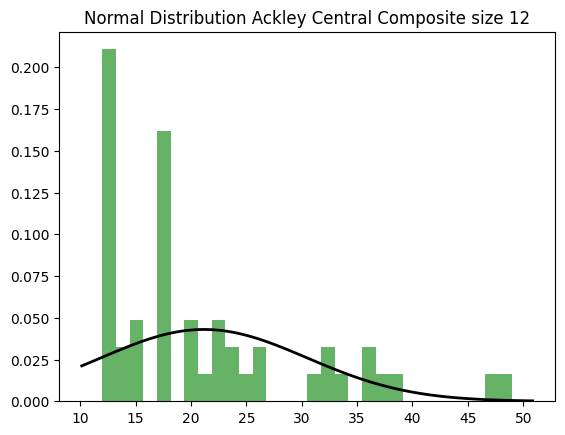

In [22]:
threshold = 0.1
converge_iter_num_lst_ack_cc_12 = []
for local_opt_mappings in local_opt_ack_cc_12_mappings_lst:
    converge_iter_num_lst_ack_cc_12.append(find_stable_point(local_opt_mappings, 12, threshold))

numbers = converge_iter_num_lst_ack_cc_12
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Ackley Central Composite size 12")
plt.show()

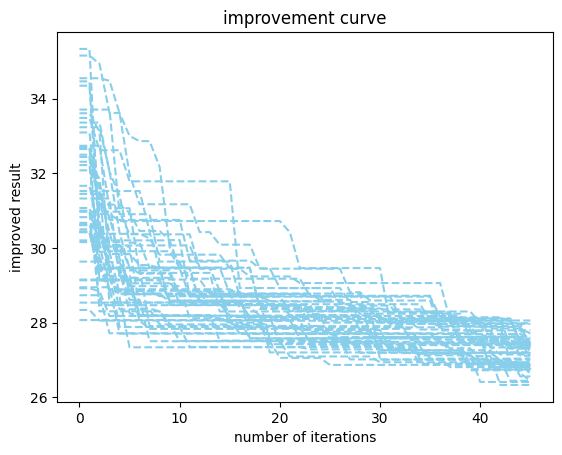

In [23]:
improve_iter_num_lst_lst_ack_cc_12 = []
for local_opt_mappings in local_opt_ack_cc_12_mappings_lst:
    improve_iter_num_lst_lst_ack_cc_12.append(imporvement_curve(local_opt_mappings, start_index = 13))

x_value=range(len(improve_iter_num_lst_lst_ack_cc_12[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_ack_cc_12):
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

AckleyFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 14

In [21]:
local_opt_ack_cc_14_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(3,3))
    bayes_opt_central_comp_ackley_14_local_opt = BOTemperatureGP(evaluation_component=ackley_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=14)
    local_opt_ack_cc_14_mappings_lst.append(bayes_opt_central_comp_ackley_14_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:42<00:00,  8.06s/it]


In [24]:
local_opt_ack_cc_14_mappings_lst[0]

{(5.292893218813452, 5.292893218813452): 30.419956266400703,
 (6.707106781186548, 5.292893218813452): 29.443689116516975,
 (5.292893218813452, 6.707106781186548): 29.46133677218852,
 (6.707106781186548, 6.707106781186548): 28.725545525228494,
 (6.0, 6.0): 31.456791759451704,
 (5.0, 6.0): 32.05894014825324,
 (7.0, 6.0): 30.878788574327512,
 (6.0, 5.0): 32.07132539004267,
 (6.0, 7.0): 30.872620341767803,
 (5.0799999999996786, 5.799999999999663): 31.24373657444356,
 (4.319999999999695, 6.089999999999655): 30.909029634883183,
 (5.6899999999996655, 5.179999999999676): 30.489230366466188,
 (5.5999999999996675, 4.719999999999686): 30.436002186643126,
 (6.599999999999646, 5.829999999999663): 29.322319273678428,
 (6.189999999999657, 6.349999999999653): 29.309162844697322,
 (8.089999999999613, 6.39999999999965): 28.397792488166846,
 (6.229999999999656, 7.859999999999619): 29.016177477625615,
 (4.249999999999696, 4.569999999999689): 31.621306954182433,
 (7.629999999999626, 6.279999999999653): 28.

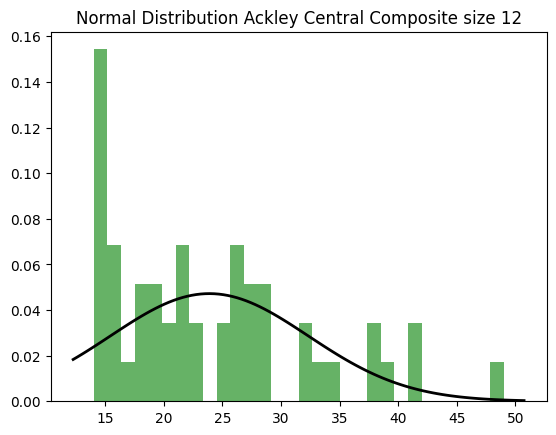

In [25]:
threshold = 0.1
converge_iter_num_lst_ack_cc_14 = []
for local_opt_mappings in local_opt_ack_cc_14_mappings_lst:
    converge_iter_num_lst_ack_cc_14.append(find_stable_point(local_opt_mappings, 14, threshold))

numbers = converge_iter_num_lst_ack_cc_14
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Ackley Central Composite size 12")
plt.show()

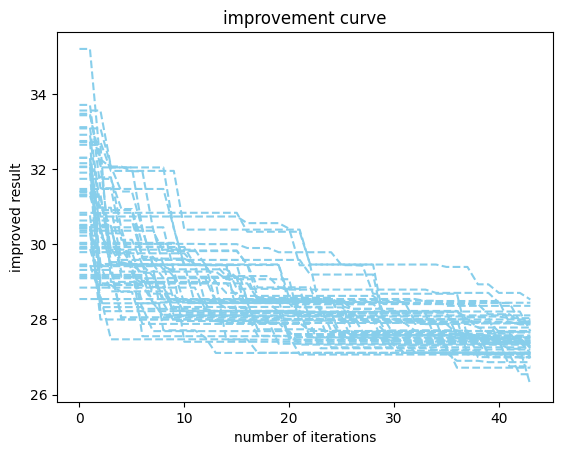

In [26]:
improve_iter_num_lst_lst_ack_cc_14 = []
for local_opt_mappings in local_opt_ack_cc_14_mappings_lst:
    improve_iter_num_lst_lst_ack_cc_14.append(imporvement_curve(local_opt_mappings, start_index = 15))

x_value=range(len(improve_iter_num_lst_lst_ack_cc_14[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_ack_cc_14):
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

NonConvexFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 8

In [31]:
local_opt_non_cc_8_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(0,0))
    bayes_opt_central_comp_non_8_local_opt = BOTemperatureGP(evaluation_component=non_convex_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=8)
    local_opt_non_cc_8_mappings_lst.append(bayes_opt_central_comp_non_8_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:44<00:00,  8.10s/it]


In [32]:
local_opt_non_cc_8_mappings_lst[0]

{(5.292893218813452, 5.292893218813452): -50.021237272613135,
 (6.707106781186548, 5.292893218813452): -63.00172435563553,
 (5.292893218813452, 6.707106781186548): -63.006758341271855,
 (6.707106781186548, 6.707106781186548): -73.354311658849,
 (5.0, 6.0): -55.542710957067676,
 (7.0, 6.0): -70.5304592619932,
 (6.0, 5.0): -55.56059859742589,
 (6.0, 7.0): -70.51372017475809,
 (2.6899999999997295, 1.9999999999997442): -3.740890285570934,
 (-1.510000000000181, -9.250000000000016): -89.01798735944372,
 (8.919999999999597, -4.3000000000001215): -91.0438741919692,
 (-7.330000000000057, -2.2400000000001654): -64.97079926328432,
 (-5.3000000000001, 7.399999999999629): -77.98620761267728,
 (-9.640000000000008, -9.760000000000005): -169.7482827594628,
 (2.519999999999733, -3.9600000000001288): -10.928716785223644,
 (5.809999999999663, -9.930000000000001): -147.94657435134266,
 (-9.880000000000003, 3.0599999999997216): -89.09225479880004,
 (-2.8800000000001518, 1.9799999999997446): -4.520781642417

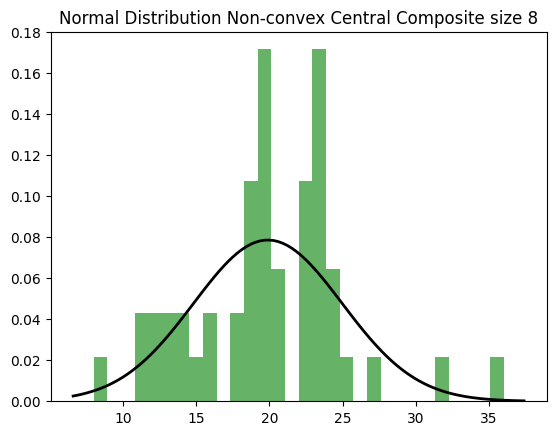

In [37]:
threshold = 0.5
converge_iter_num_lst_non_cc_8 = []
for local_opt_mappings in local_opt_non_cc_8_mappings_lst:
    converge_iter_num_lst_non_cc_8.append(find_stable_point(local_opt_mappings, 8, threshold))

numbers = converge_iter_num_lst_non_cc_8
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Non-convex Central Composite size 8")
plt.show()

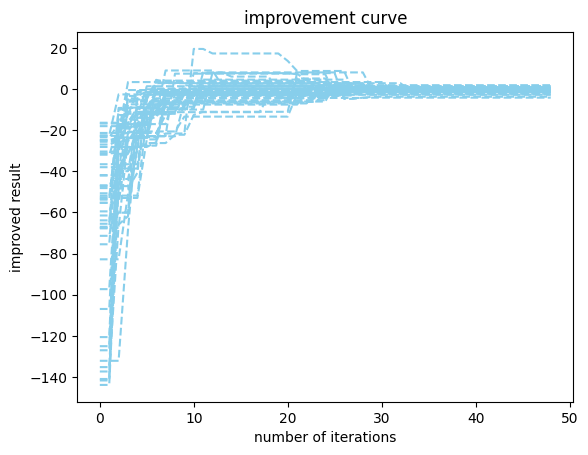

In [35]:
improve_iter_num_lst_lst_non_cc_8 = []
for local_opt_mappings in local_opt_non_cc_8_mappings_lst:
    improve_iter_num_lst_lst_non_cc_8.append(imporvement_curve(local_opt_mappings, start_index = 9))

x_value=range(len(improve_iter_num_lst_lst_non_cc_8[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_non_cc_8):
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

NonConvexFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 12

In [38]:
local_opt_non_cc_12_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(2,2))
    bayes_opt_central_comp_non_12_local_opt = BOTemperatureGP(evaluation_component=non_convex_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=12)
    local_opt_non_cc_12_mappings_lst.append(bayes_opt_central_comp_non_12_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:34<00:00,  7.90s/it]


In [42]:
local_opt_non_cc_12_mappings_lst[0]

{(5.292893218813452, 5.292893218813452): -50.01988322708306,
 (6.707106781186548, 5.292893218813452): -63.01246693930777,
 (5.292893218813452, 6.707106781186548): -62.997830679654044,
 (6.707106781186548, 6.707106781186548): -73.35321671806174,
 (6.0, 6.0): -53.55534007907027,
 (5.0, 6.0): -55.54726934384687,
 (7.0, 6.0): -70.52604520169646,
 (6.0, 5.0): -55.54357562662097,
 (6.0, 7.0): -70.52834837839725,
 (4.55999999999969, -5.690000000000092): -55.690658392619454,
 (-8.990000000000022, -8.210000000000038): -141.90505511634623,
 (-9.120000000000019, 6.649999999999643): -145.20712387028692,
 (-2.8400000000001526, 0.14999999999978364): -26.96961340492595,
 (-1.8100000000001746, 9.73999999999958): -93.62931264271909,
 (-1.6600000000001778, -9.440000000000012): -90.07394067898707,
 (-9.850000000000003, -1.1000000000001897): -106.49423853640599,
 (9.869999999999578, -0.7800000000001965): -110.87192298120105,
 (9.909999999999577, -8.990000000000022): -162.9727510800483,
 (3.209999999999718

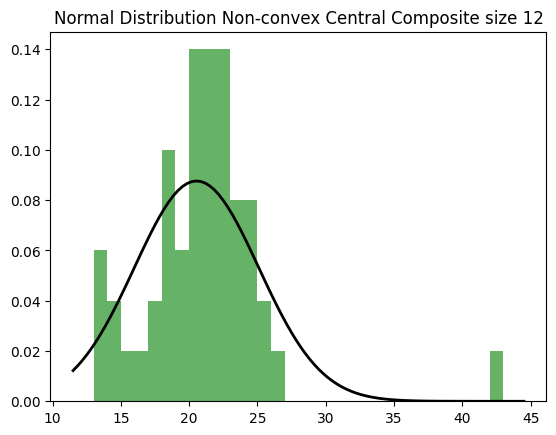

In [64]:
threshold = 0.5
converge_iter_num_lst_non_cc_12 = []
for local_opt_mappings in local_opt_non_cc_12_mappings_lst:
    converge_iter_num_lst_non_cc_12.append(find_stable_point(local_opt_mappings, 12, threshold))

numbers = converge_iter_num_lst_non_cc_12
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Non-convex Central Composite size 12")
plt.show()

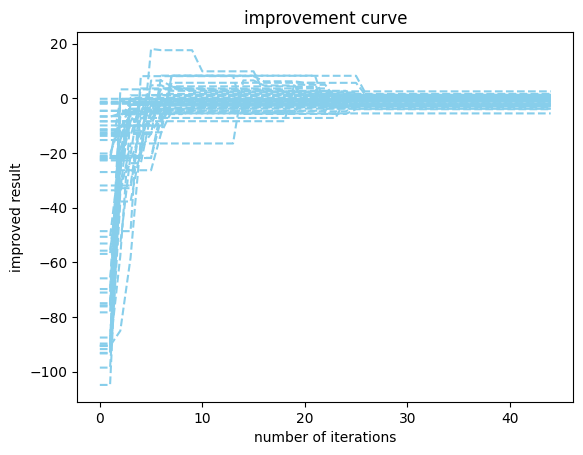

In [53]:
improve_iter_num_lst_lst_non_cc_12 = []
for local_opt_mappings in local_opt_non_cc_12_mappings_lst:
    improve_iter_num_lst_lst_non_cc_12.append(imporvement_curve(local_opt_mappings, start_index = 13))
x_value=range(len(improve_iter_num_lst_lst_non_cc_12[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_non_cc_12):
    if len(y_values) != len(x_value):
        y_values.pop()
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

NonConvexFunction localoptimum(5,7) initial_method: central_composite initial_sample_size: 14

In [54]:
local_opt_non_cc_14_mappings_lst=[]
for i in tqdm(range(50)):
    central_comp_initial = CentralCompInit2D(low=5, high=7, center=(3,3))
    bayes_opt_central_comp_non_14_local_opt = BOTemperatureGP(evaluation_component=non_convex_func, initial_method=central_comp_initial, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=14)
    local_opt_non_cc_14_mappings_lst.append(bayes_opt_central_comp_non_14_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [06:33<00:00,  7.86s/it]


In [69]:
local_opt_non_cc_14_mappings_lst[2]

{(5.292893218813452, 5.292893218813452): -50.01735494503124,
 (6.707106781186548, 5.292893218813452): -62.996906738303885,
 (5.292893218813452, 6.707106781186548): -63.018249751460964,
 (6.707106781186548, 6.707106781186548): -73.35673937849768,
 (6.0, 6.0): -53.56326272986198,
 (5.0, 6.0): -55.55759615808814,
 (7.0, 6.0): -70.52026894476431,
 (6.0, 5.0): -55.545806763782466,
 (6.0, 7.0): -70.51413967818203,
 (-7.66000000000005, -4.610000000000115): -80.3305698336564,
 (2.3099999999997376, -7.290000000000058): -65.68619652804682,
 (-4.280000000000122, 7.83999999999962): -79.89166946797361,
 (9.779999999999578, -3.760000000000133): -94.51570814888075,
 (-1.2500000000001865, 0.13999999999978385): 4.679357266196327,
 (-0.9600000000001927, -0.18000000000020933): 10.321363062566576,
 (-0.8000000000001961, -0.45000000000020357): 11.715376458975138,
 (0.07999999999978513, -0.1900000000002091): 19.537580891803227,
 (-0.09000000000021124, -0.2100000000002087): 19.410718869171646,
 (-0.030000000

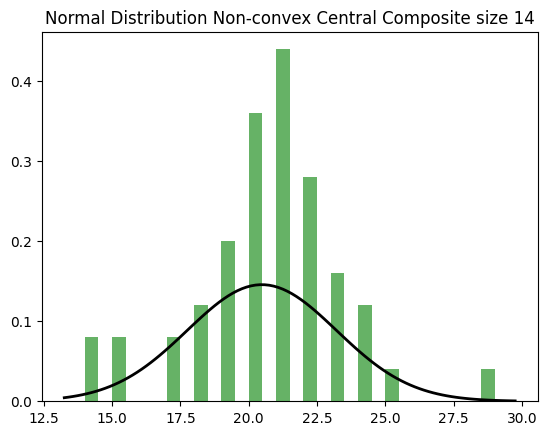

In [55]:
threshold = 0.5
converge_iter_num_lst_non_cc_14 = []
for local_opt_mappings in local_opt_non_cc_14_mappings_lst:
    converge_iter_num_lst_non_cc_14.append(find_stable_point(local_opt_mappings, 14, threshold))

numbers = converge_iter_num_lst_non_cc_14
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Non-convex Central Composite size 14")
plt.show()

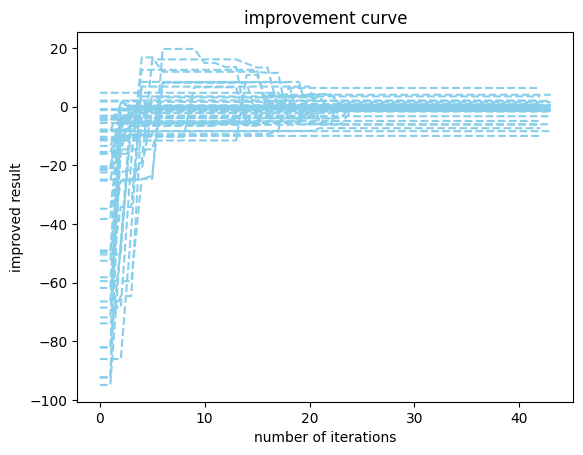

In [72]:
improve_iter_num_lst_lst_non_cc_14 = []
for local_opt_mappings in local_opt_non_cc_14_mappings_lst:
    improve_iter_num_lst_lst_non_cc_14.append(imporvement_curve(local_opt_mappings, start_index = 15))

x_value=range(len(improve_iter_num_lst_lst_non_cc_14[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_non_cc_14):
    if len(y_values) < len(x_value):
        x_value=range(len(improve_iter_num_lst_lst_non_cc_14[0])-1)
    if len(y_values) > len(x_value):
        y_values.pop()
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

NonConvexFunction localoptimum(5,7) initial_method: random initial_sample_size: 12

In [67]:
from simple_GP_temperature.local_optima_initial_non_convex_2d import LocalOptimaInit2DNonConvex
random_init = LocalOptimaInit2DNonConvex(low=[5,5],high=[7,7])
local_opt_non_rd_12_mappings_lst=[]
for i in tqdm(range(50)):
    bayes_opt_rd_non_12_local_opt = BOTemperatureGP(evaluation_component=non_convex_func, initial_method=random_init, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=12)
    local_opt_non_rd_12_mappings_lst.append(bayes_opt_rd_non_12_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [07:13<00:00,  8.67s/it]


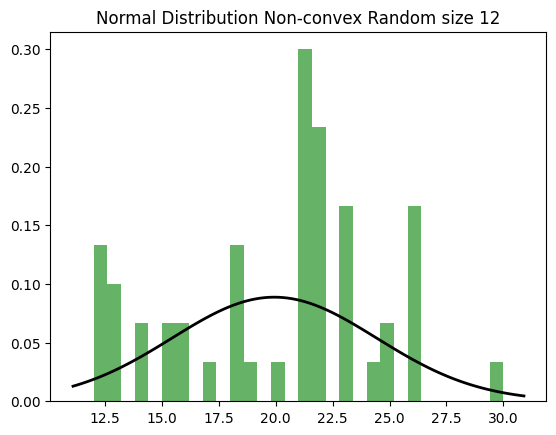

In [71]:
threshold = 0.5
converge_iter_num_lst_non_rd_12 = []
for local_opt_mappings in local_opt_non_rd_12_mappings_lst:
    converge_iter_num_lst_non_rd_12.append(find_stable_point(local_opt_mappings, 12, threshold))

numbers = converge_iter_num_lst_non_rd_12
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Non-convex Random size 12")
plt.show()

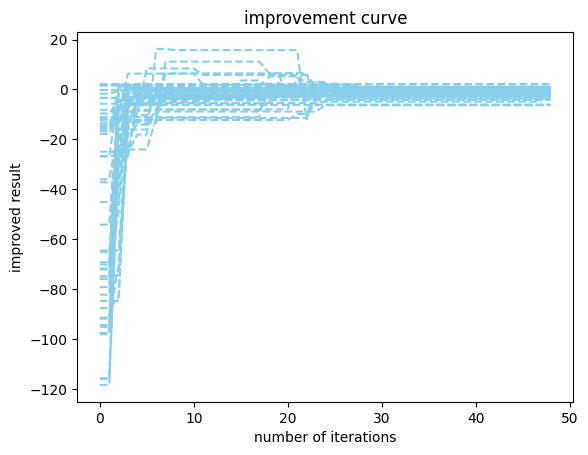

In [77]:
improve_iter_num_lst_lst_non_rd_12 = []
for local_opt_mappings in local_opt_non_rd_12_mappings_lst:
    improve_iter_num_lst_lst_non_rd_12.append(imporvement_curve(local_opt_mappings, start_index = 13))

x_value=range(len(improve_iter_num_lst_lst_non_rd_12[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_non_rd_12):
    if len(y_values) < len(x_value):
        x_value=range(len(improve_iter_num_lst_lst_non_rd_12[0])-1)
    if len(y_values) > len(x_value):
        y_values.pop()
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

NonConvexFunction localoptimum(5,7) initial_method: random initial_sample_size: 14

In [78]:
from simple_GP_temperature.local_optima_initial_non_convex_2d import LocalOptimaInit2DNonConvex
random_init = LocalOptimaInit2DNonConvex(low=[5,5],high=[7,7])
local_opt_non_rd_14_mappings_lst=[]
for i in tqdm(range(50)):
    bayes_opt_rd_non_14_local_opt = BOTemperatureGP(evaluation_component=non_convex_func, initial_method=random_init, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=14)
    local_opt_non_rd_14_mappings_lst.append(bayes_opt_rd_non_14_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [07:20<00:00,  8.81s/it]


In [79]:
local_opt_non_rd_14_mappings_lst = local_opt_non_rd_12_mappings_lst
local_opt_non_rd_14_mappings_lst[0]

{(6.027000000000343, 5.073000000000024): -55.22515890216655,
 (6.7980000000006005, 6.590000000000531): -73.04192552747878,
 (6.149000000000384, 5.563000000000188): -53.85915042442042,
 (5.20900000000007, 5.2500000000000835): -49.809864082666024,
 (6.995000000000666, 6.142000000000381): -71.67182276356024,
 (5.446000000000149, 6.758000000000587): -63.43403647548212,
 (6.130000000000377, 5.525000000000175): -53.742871881440834,
 (5.504000000000168, 5.011000000000004): -51.21429607192107,
 (6.4000000000004675, 5.573000000000191): -56.949806959099284,
 (6.387000000000463, 5.872000000000291): -57.04304965290681,
 (6.481000000000495, 6.210000000000404): -61.02465305841815,
 (5.498000000000166, 5.288000000000096): -50.50918883274757,
 (6.458000000000487, 6.183000000000395): -60.324097330927636,
 (6.177000000000393, 6.076000000000359): -55.61444407834291,
 (6.099999999999657, -9.300000000000015): -143.2021607389973,
 (-9.51000000000001, -5.450000000000097): -133.5463245712981,
 (-5.70000000000

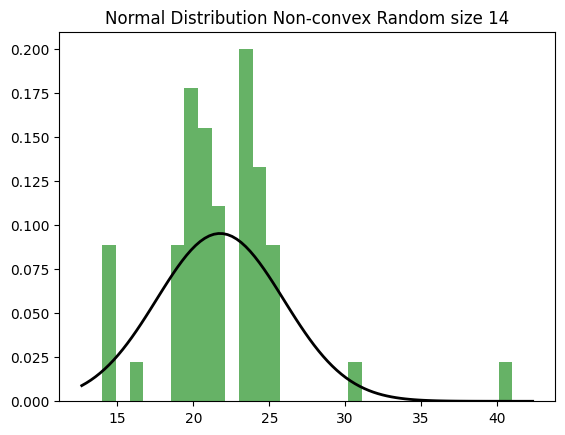

In [81]:
threshold = 0.5
converge_iter_num_lst_non_rd_14 = []
for local_opt_mappings in local_opt_non_rd_14_mappings_lst:
    converge_iter_num_lst_non_rd_14.append(find_stable_point(local_opt_mappings, 14, threshold))

numbers = converge_iter_num_lst_non_rd_14
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Non-convex Random size 14")
plt.show()

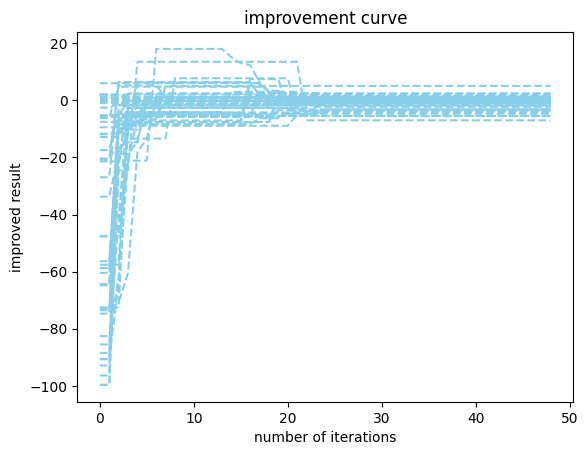

In [82]:
improve_iter_num_lst_lst_non_rd_14 = []
for local_opt_mappings in local_opt_non_rd_14_mappings_lst:
    improve_iter_num_lst_lst_non_rd_14.append(imporvement_curve(local_opt_mappings, start_index = 15))

x_value=range(len(improve_iter_num_lst_lst_non_rd_14[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_non_rd_14):
    if len(y_values) < len(x_value):
        x_value=range(len(improve_iter_num_lst_lst_non_rd_14[0])-1)
    if len(y_values) > len(x_value):
        y_values.pop()
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()

AckleyFunction localoptimum(5,7) initial_method: Random_init initial_sample_size: 12

In [83]:
from simple_GP_temperature.local_optima_initial_non_convex_2d import LocalOptimaInit2DNonConvex
random_init = LocalOptimaInit2DNonConvex(low=[5,5],high=[7,7])
local_opt_ack_rd_12_mappings_lst=[]
for i in tqdm(range(50)):
    bayes_opt_rd_ack_12_local_opt = BOTemperatureGP(evaluation_component=ackley_func, initial_method=random_init, 
                                      lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50, initial_sample_size=12)
    local_opt_ack_rd_12_mappings_lst.append(bayes_opt_rd_ack_12_local_opt.optimise())

100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [07:14<00:00,  8.69s/it]


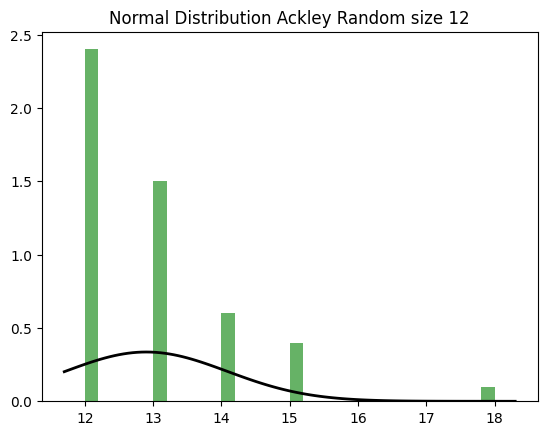

In [84]:
threshold = 0.5
converge_iter_num_lst_ack_rd_12 = []
for local_opt_mappings in local_opt_ack_rd_12_mappings_lst:
    converge_iter_num_lst_ack_rd_12.append(find_stable_point(local_opt_mappings, 12, threshold))

numbers = converge_iter_num_lst_ack_rd_12
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Ackley Random size 12")
plt.show()

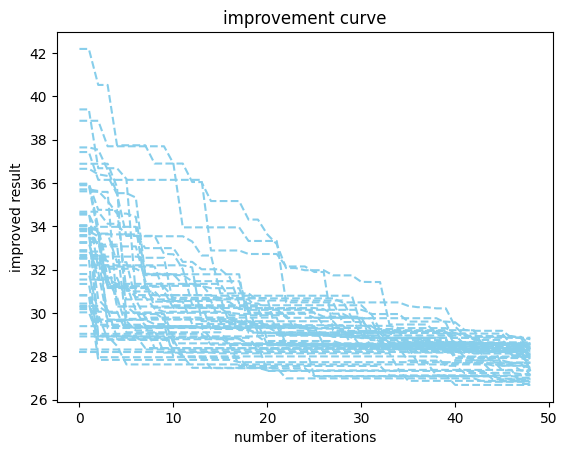

In [85]:
improve_iter_num_lst_lst_ack_rd_12 = []
for local_opt_mappings in local_opt_ack_rd_12_mappings_lst:
    improve_iter_num_lst_lst_ack_rd_12.append(imporvement_curve(local_opt_mappings, start_index = 13))

x_value=range(len(improve_iter_num_lst_lst_ack_rd_12[0]))
for i, y_values in enumerate(improve_iter_num_lst_lst_ack_rd_12):
    if len(y_values) < len(x_value):
        x_value=range(len(improve_iter_num_lst_lst_ack_rd_12[0])-1)
    if len(y_values) > len(x_value):
        y_values.pop()
    plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

plt.title('improvement curve')
plt.xlabel('number of iterations')
plt.ylabel('improved result')
plt.show()